<center>
    <img src="https://i.ibb.co/wQg0qzq/Banner.png" width="900" alt="KCode Banner"  />
</center>
<a href="https://www.linkedin.com/in/kauebr/"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" width="30" ></a> <a href="mailto: kauemandarino@gmail.com"><img src="https://cdn-icons-png.flaticon.com/512/5968/5968534.png" width="30" ></a><a href="
https://api.whatsapp.com/send?phone=5541991835800&text=Oi"> <img src="https://imagepng.org/wp-content/uploads/2017/08/whatsapp-icone-1.png" width="30" ></a><a href="https://github.com/kauebr/"><img src="https://github.githubassets.com/images/modules/logos_page/Octocat.png" width="30" ></a>




# Vizinho mais próximos de K - KNN - K Nearest Neighbors 

## Objetivo



*   Usar o algoritmo K Nearest Neighbors para classificar dados.

Neste notebook vamos carregar um conjunto de dados de clientes, ajustar os dados e usar algoritmo **K-Nearest Neighbors** para fazer predicções.

**K-Nearest Neighbors** É um algoritmo de aprendizado supervisionado, onde os dados são treinados com pontos de dados que corresponder a sua classificação.
Para fazer predições de classes de novos pontos de dados, o Algoritmo leva em conta as classes dos vizinho mais próximos do ponto de dados 'K' e escolhe a classe na qual a maioria dos pontos de dados 'K' mais próximos pertencem como a classe prevista.

### Aqui está uma visualização do algoritmo K-Nearest Neighbors.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/KNN_Diagram.png">


Neste caso, temos pontos de dados de Classe A e B. Queremos prever qual é a estrela (ponto de dados de teste). Se considerarmos um valor de k de 3 (3 pontos de dados mais próximos), obteremos uma previsão de Classe B. No entanto, se considerarmos um valor de k de 6, obteremos uma previsão de Classe A.

Nesse sentido, é importante considerar o valor de k; a partir deste diagrama, da para ter uma noção do que é o algoritmo K-Nearest Neighbors. Ele considera os vizinhos mais próximos 'K' (pontos de dados) quando prevê a classificação do ponto de teste.

<h1>Índice</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
     <ol>
         <li><a href="https://#about_dataset">Sobre o conjunto de dados</a></li>
         <li><a href="https://#visualization_analysis">Visualização e análise de dados</a></li>
         <li><a href="https://#classification">Classificação</a></li>
     </ol>
</div>
<br>
<hr>


Vamos carregar as bibliotecas necessárias

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

<div id="about_dataset">
     <h2>Sobre o conjunto de dados</h2>
</div>

Imagine que um provedor de telecomunicações tenha segmentado sua base de clientes por padrões de uso de serviço, categorizando os clientes em quatro grupos. Se os dados demográficos puderem ser usados para prever a associação ao grupo, a empresa poderá personalizar ofertas para clientes potenciais individuais. É um problema de classificação. Ou seja, dado o conjunto de dados, com rótulos predefinidos, precisamos construir um modelo a ser usado para prever a classe de um caso novo ou desconhecido.

O exemplo se concentra no uso de dados demográficos, como região, idade e casamento, para prever padrões de uso.

O campo de destino, chamado **custcat**, tem quatro valores possíveis que correspondem aos quatro grupos de clientes, da seguinte forma:

1- Serviço Básico

2- Serviço Eletrônico

3- Mais Serviço

4- Serviço Total

Nosso objetivo é construir um classificador, para prever a classe de casos desconhecidos. Usaremos um tipo específico de classificação chamado K vizinho mais próximo.

In [4]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


<div id="visualization_analysis">
       <h2>Visualização e análise de dados</h2>
</div>

### Vamos ver quantos de cada classe estão em nosso conjunto de dados

In [5]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

#### 281 Plus Service, 266 Basic-service, 236 Total Service e 217 E-Service clientes

explorando os dados usando técnicas de visualização:

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

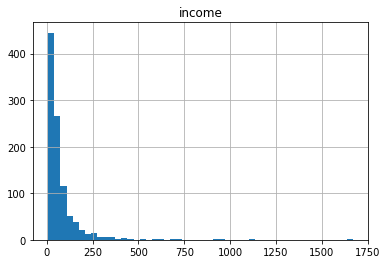

In [8]:
df.hist(column='income', bins=50)

### Conjunto de características

Vamos definir conjuntos de características, X:


In [10]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')


Para usar a biblioteca scikit-learn, temos que converter o quadro de dados do Pandas em um array Numpy: